# E-COMMERCE SALES ANALYSIS



# PROBLEM STATEMENT

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [13]:
df = pd.read_csv(r"e-commerce_sales_data.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Cleaning

In [14]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Exploratory Data Analysis

In [33]:
# Displaying columns containing at least one value of 0 (zero).
df.columns[df.isin([0]).any()]

Index([], dtype='object')

In [18]:
# Calculating the mean of 'UnitPrice'
unit_price_mean = df['UnitPrice'].mean()

In [19]:
df['UnitPrice'] = df['UnitPrice'].replace(0, unit_price_mean)

In [22]:
df['Description'].fillna('No description available')
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
# Replace missing value in 'CustomerID'
def fill_customer_id(row):
    if pd.isna(row['CustomerID']):
        return f"Customer of Invoice Nº {row['InvoiceNo']}"
    else:
        return row['CustomerID']

df['CustomerID'] = df.apply(fill_customer_id, axis=1)
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [24]:
#Change the 'InvoiceDate' column to datetime objects.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


# Data Visualisation

C:\Users\admin\AppData\Local\Temp\ipykernel_10124\2213328141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')


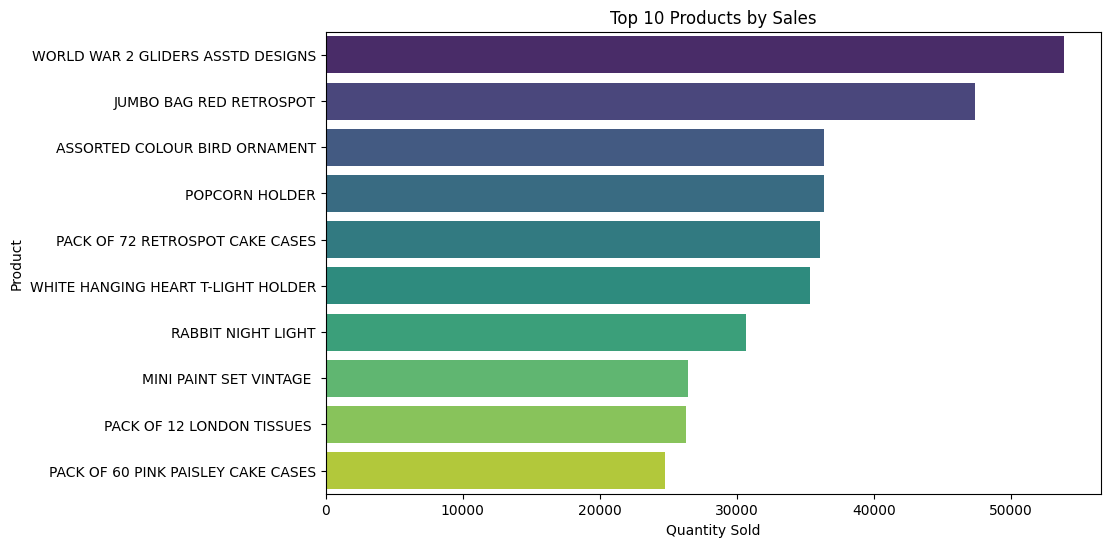

In [26]:
sales_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Products by Sales')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10124\3102349837.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette='viridis')


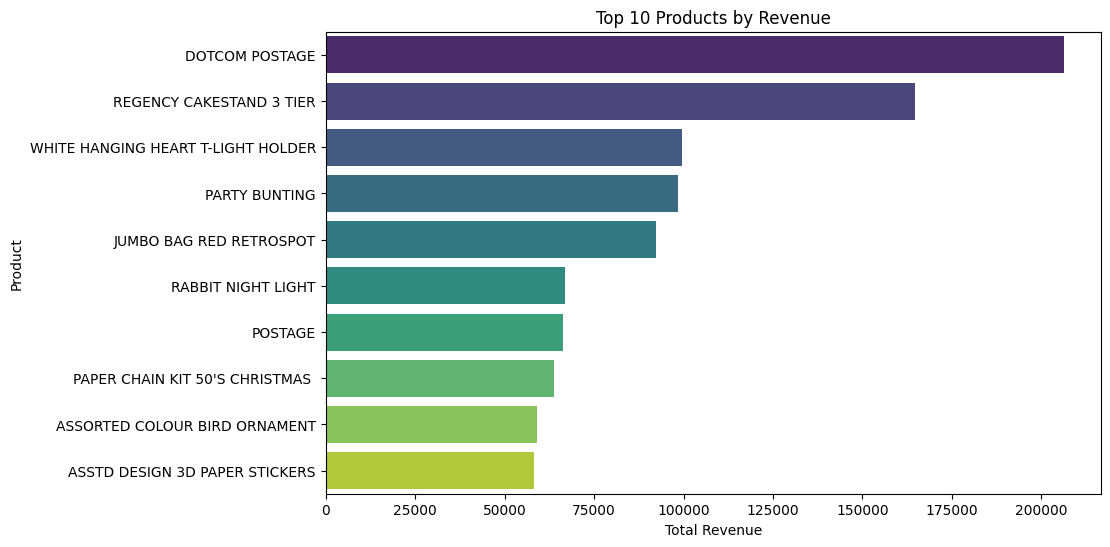

In [27]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_revenue_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette='viridis')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.title('Top 10 Products by Revenue')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10124\469550824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='pastel')


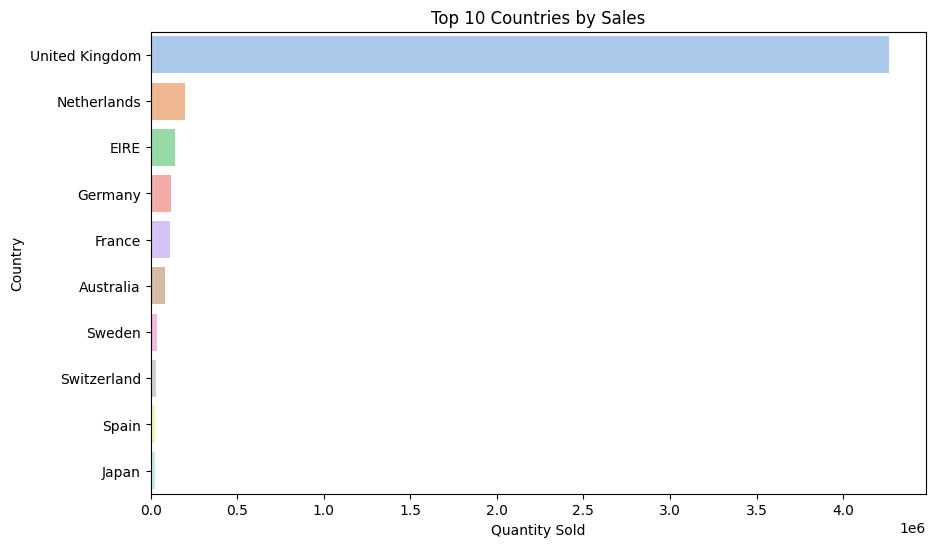

In [28]:
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='pastel')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.title('Top 10 Countries by Sales')
plt.show()

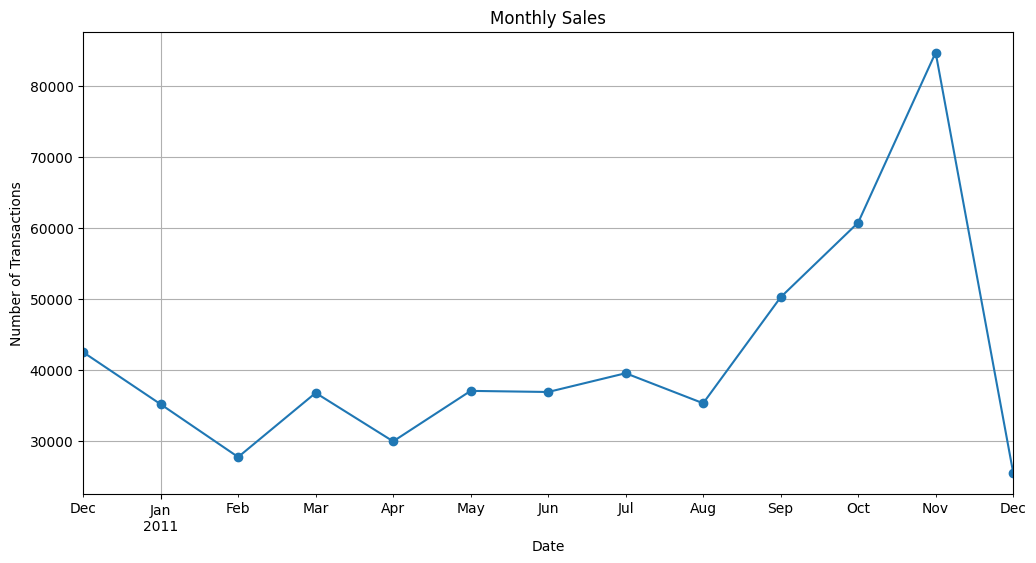

In [29]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').size()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Sales')
plt.grid(True)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10124\124349247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='pastel')


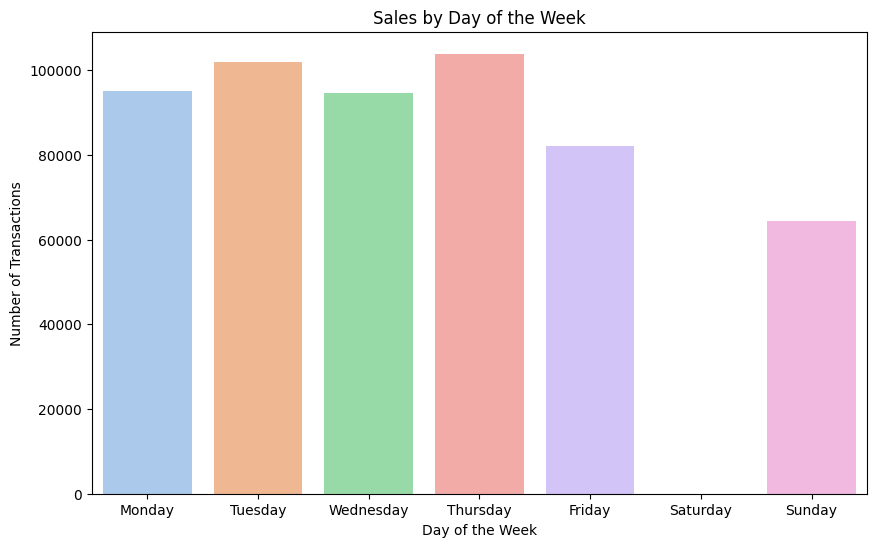

In [30]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
weekday_sales = df.groupby('DayOfWeek').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='pastel')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Sales by Day of the Week')
plt.show()

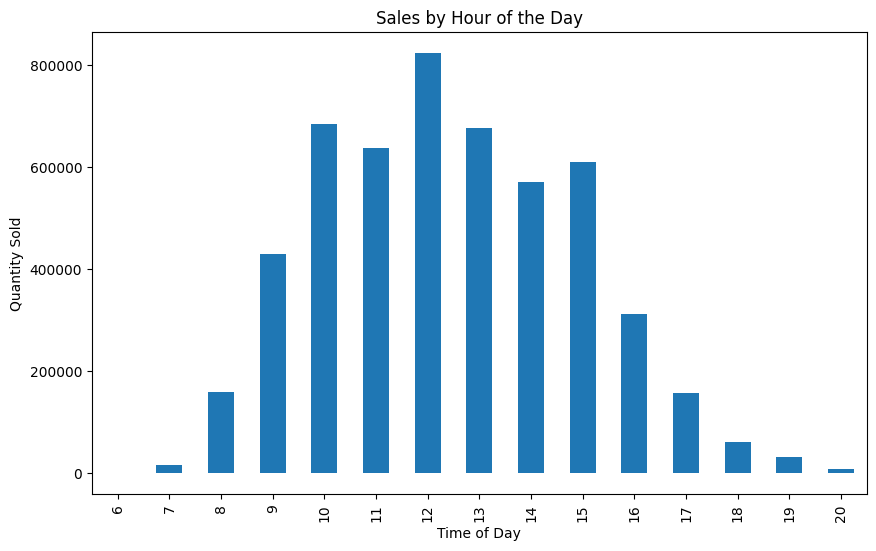

In [31]:
df['Hour'] = df['InvoiceDate'].dt.hour
sales_by_hour = df.groupby('Hour')['Quantity'].sum()

plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Quantity Sold')
plt.title('Sales by Hour of the Day')
plt.show()

# CONCLUSION AND SUGGESTIONS

1. The best-selling products include "WORLD WAR 2 GLIDERS ASSTD DESIGNS" and "JUMBO BAG RED RETROSPOT". These items represent popular products that should be kept in inventory due to their high demand.
2. The products that generate the highest revenue are "DOTCOM POSTAGE" and "REGENCY CAKESTAND 3 TIER". These items not only have high sales volumes but also contribute significantly to the store's total revenue.
3. The United Kingdom leads in sales, followed by the Netherlands and EIRE. These data highlight the importance of the domestic market and potential opportunities in key international markets.
4. Monthly sales show a seasonal pattern with significant peaks from September to November. These peaks can be attributed to events such as holidays or successful promotional campaigns.
5. Sales show a relatively even distribution throughout the week, with a slight decrease on Fridays and Saturdays. This suggests that marketing and promotion strategies should consider adjustments to boost sales on these days.
6. Peak sales hours are observed between 9:00 AM and 3:00 PM, with a peak at 12:00 PM. This pattern indicates optimal times to implement promotional strategies and efficiently manage resources during periods of high demand.